In [6]:
import numpy as np
import cv2
import pytesseract # Use REnv1 btw
import matplotlib.pyplot as plt
import os
import struct

In [7]:
def raw_to_img(HEXADECIMAL_BYTES):
    # Reformat the bytes into an image
    raw_bytes = np.array(HEXADECIMAL_BYTES, dtype="i2")
    image = np.zeros((len(raw_bytes),3), dtype=int)

    # Loop through all of the pixels and form the image
    for i in range(len(raw_bytes)):
        #Read 16-bit pixel
        pixel = struct.unpack('>h', raw_bytes[i])[0]

        #Convert RGB565 to RGB 24-bit
        r = ((pixel >> 11) & 0x1f) << 3
        g = ((pixel >> 5) & 0x3f) << 2
        b = ((pixel >> 0) & 0x1f) << 3
        image[i] = [r,g,b]

    image = np.reshape(image,(144, 176,3)) #QCIF resolution
    return image

In [22]:
raw_imgs = []

In [ ]:
raw_imgs.append([])

In [12]:
images = []

In [13]:
for raw_image in raw_imgs:
    image = raw_to_img(raw_image)
    image = image.astype(np.uint8)
    # Grayscale, Gaussian blur, Otsu's threshold
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    images.append(image)

In [14]:
stitcher = cv2.Stitcher.create() # cv2.createStitcher(), if diff ver
# images is a list of images
(status, stitched) = stitcher.stitch(images)

In [15]:
status

1

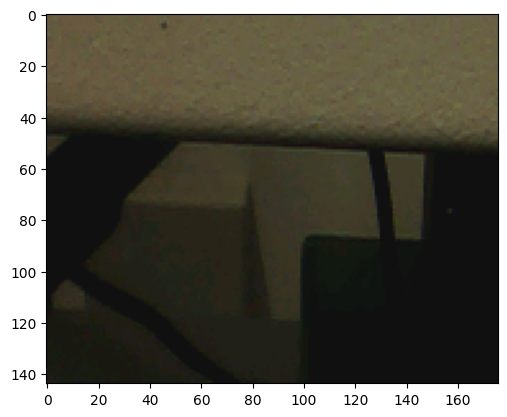

In [16]:
plt.imshow(images[0])

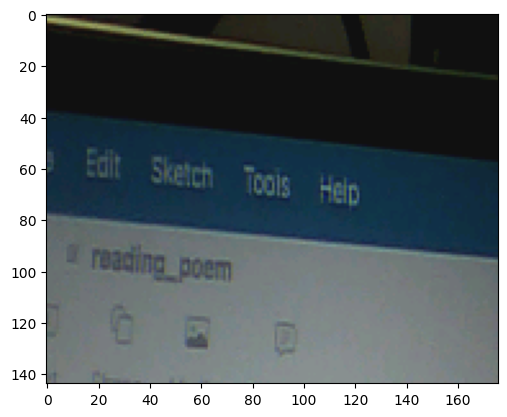

In [17]:
plt.imshow(images[1])

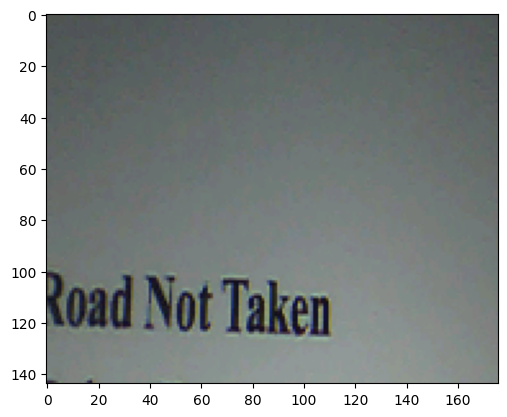

In [18]:
plt.imshow(images[2])

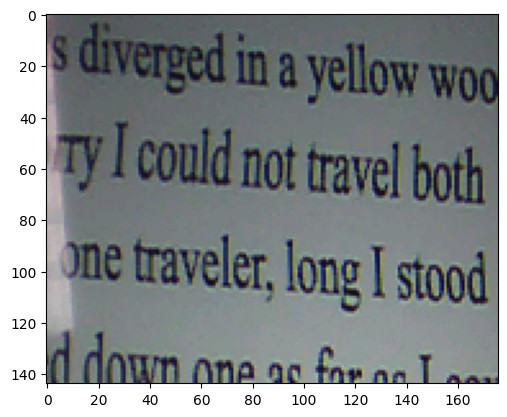

In [19]:
plt.imshow(images[3])

In [20]:
output = pytesseract.image_to_string(images[3], lang='eng', config='--psm 6')
print(output)

“diverged ina yellow woo
Ty could not travel both
‘ne traveler, long I stood
nn. 8 + os



In [21]:
output = output.replace('\n', ' ')
os.system("say -v 'Samantha' " + output)

0